# Predicting Car Prizes

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# To reduce output size while working with vscode
%config InlineBackend.figure_format = 'png'

%matplotlib inline

# Display all columns
pd.options.display.max_columns = None

FIGURES_PATH = "plots/"
DATASETS_PATH = "datasets/"

def save_fig(name, extension="png", resolution=300):
    os.makedirs(FIGURES_PATH, exist_ok=True)
    path = os.path.join(FIGURES_PATH, name + "." + extension)
    # print("Saving figure", name)
    plt.tight_layout()
    plt.savefig(path, format=extension, dpi=resolution)

np.random.seed(42)

In [2]:
AUDI_DATASET_PATH = os.path.join(DATASETS_PATH, "audi.csv")
BMW_DATASET_PATH = os.path.join(DATASETS_PATH, "bmw.csv")
FOCUS_DATASET_PATH = os.path.join(DATASETS_PATH, "focus.csv")
FORD_DATASET_PATH = os.path.join(DATASETS_PATH, "ford.csv")
HYUNDAI_DATASET_PATH = os.path.join(DATASETS_PATH, "hyundai.csv")
MERC_DATASET_PATH = os.path.join(DATASETS_PATH, "merc.csv")
SKODA_DATASET_PATH = os.path.join(DATASETS_PATH, "skoda.csv")
TOYOTA_DATASET_PATH = os.path.join(DATASETS_PATH, "toyota.csv")
VAUXHALL_DATASET_PATH = os.path.join(DATASETS_PATH, "vauxhall.csv")
VW_DATASET_PATH = os.path.join(DATASETS_PATH, "vw.csv")

audi_orig = pd.read_csv(AUDI_DATASET_PATH)
bmw_orig = pd.read_csv(BMW_DATASET_PATH)
focus_orig = pd.read_csv(FOCUS_DATASET_PATH)
ford_orig = pd.read_csv(FORD_DATASET_PATH)
hyundai_orig = pd.read_csv(HYUNDAI_DATASET_PATH)
merc_orig = pd.read_csv(MERC_DATASET_PATH)
skoda_orig = pd.read_csv(SKODA_DATASET_PATH)
toyota_orig = pd.read_csv(TOYOTA_DATASET_PATH)
vauxhall_orig = pd.read_csv(VAUXHALL_DATASET_PATH)
vw_orig = pd.read_csv(VW_DATASET_PATH)

# Audi
<img src="ext/audi.png" height=200>

## Having a look at data

In [3]:
audi = audi_orig.copy()
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [4]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [5]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [6]:
num_attribs = audi.select_dtypes("number").columns.to_numpy()
cat_attribs = audi.select_dtypes("object").columns.to_numpy()

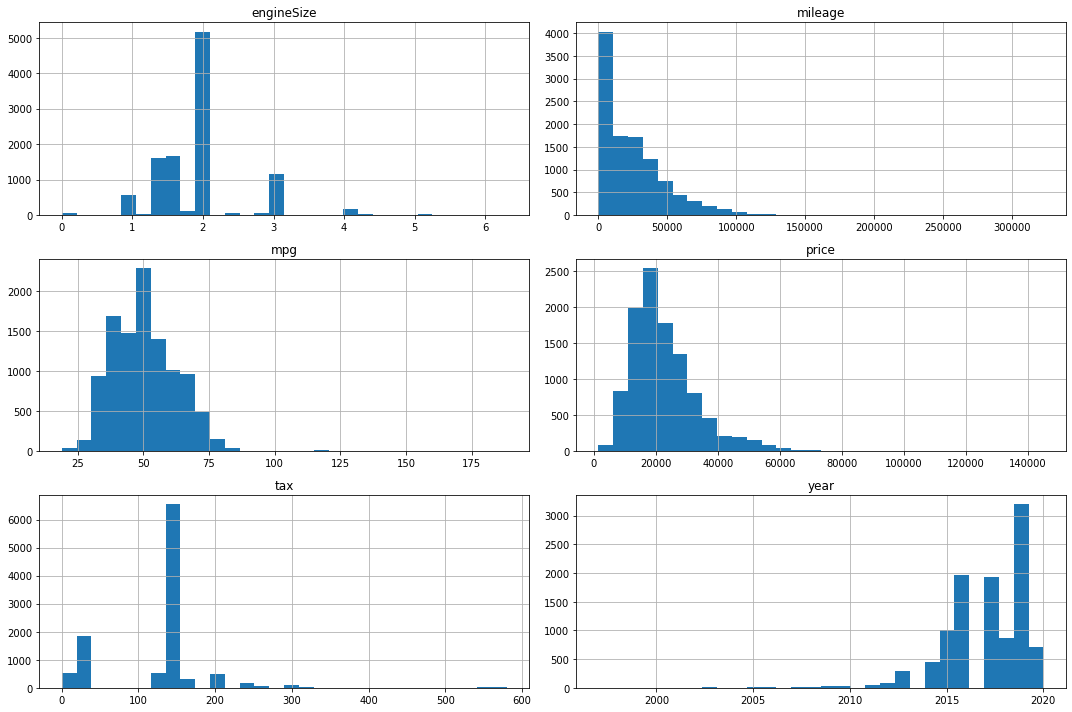

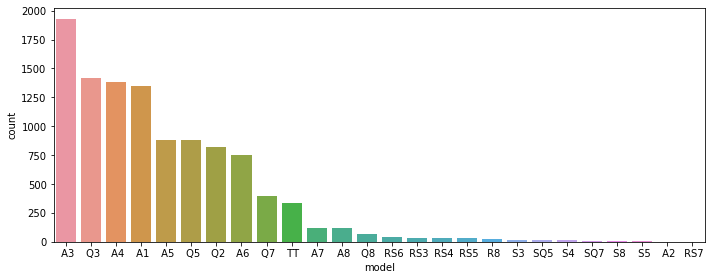

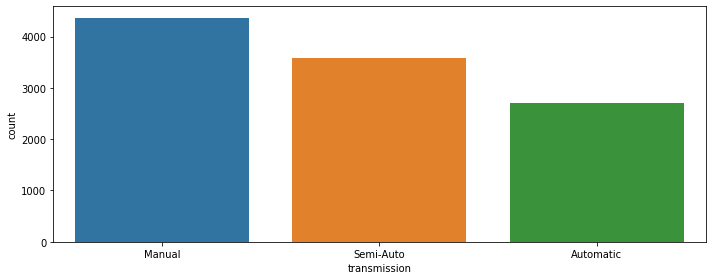

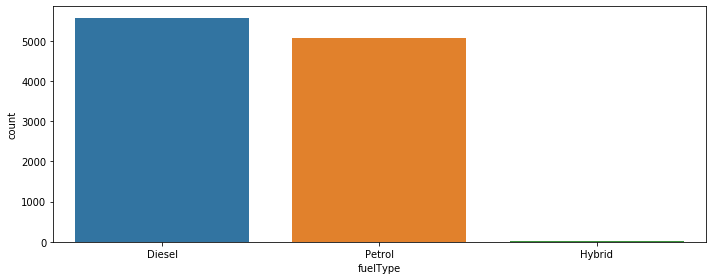

In [7]:
audi.hist(figsize=(15, 10), bins=30)
save_fig("audi_numerical_hist")
for cat in cat_attribs:
    plt.subplots(figsize=(10, 4))
    sns.countplot(cat, data=audi, order=audi[cat].value_counts().index)
    save_fig(f"audi_{cat}_hist")

## Splitting into test and train data

In [282]:
def drop_rare_car_models(data, min_models=2):
    models_to_drop = data["model"].value_counts()
    models_to_drop = models_to_drop[models_to_drop < 2].index

    data = data.drop(data[data["model"].isin(models_to_drop)].index)
    data = data.reset_index(drop=True)
    return data

In [283]:
audi = drop_rare_car_models(audi)

In [273]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(audi, audi["model"]):
    audi_train = audi.loc[train_idx]
    audi_test = audi.loc[test_idx]

print("Train size:", len(audi_train))
print("Test size:", len(audi_test))

Train size: 8532
Test size: 2134


In [274]:
pd.DataFrame({
    "Test":(audi_test["model"].value_counts() / len(audi_test)).tolist(),
    "Overall":(audi["model"].value_counts() / len(audi)).tolist()
}, index=audi["model"].value_counts().index)

,Test,Overall
A3,0.180881,0.180855
Q3,0.133083,0.132852
A4,0.129335,0.129477
A1,0.126054,0.126289
A5,0.082474,0.082693
Q5,0.082006,0.082224
Q2,0.076851,0.077067
A6,0.070291,0.070129
Q7,0.037020,0.037221
TT,0.031396,0.031502


In [25]:
from sklearn.model_selection import train_test_split
audi_train, audi_test = train_test_split(audi_orig, random_state=42, test_size=0.2)

In [26]:
audi_train.shape, audi_test.shape

((8534, 9), (2134, 9))

## Discovering data

In [71]:
audi = audi_train.copy()

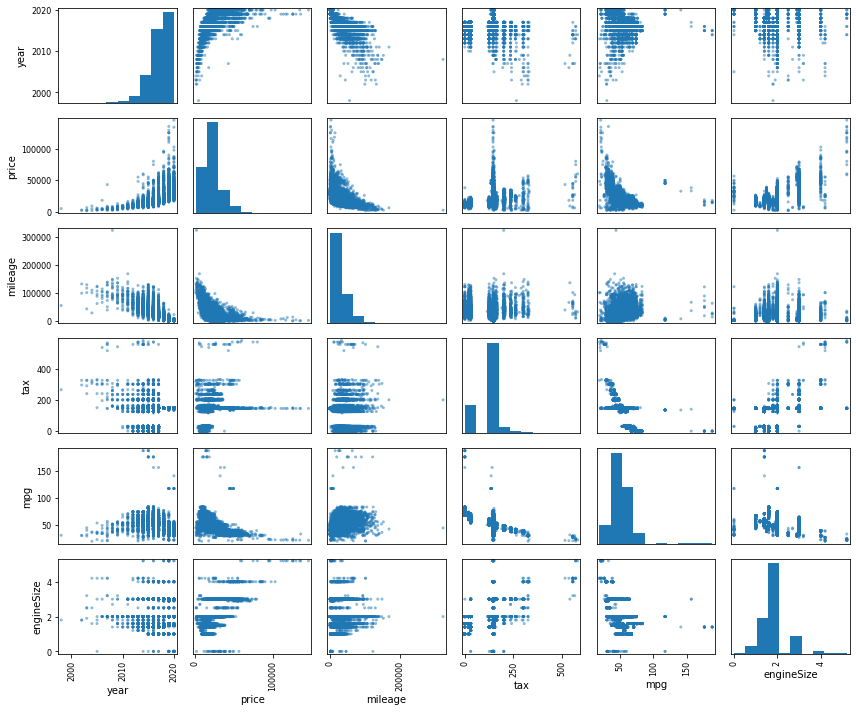

In [72]:
from pandas.plotting import scatter_matrix

attribs = num_attribs

scatter_matrix(audi[attribs], figsize=(12, 10))
save_fig("audi_scatter_matrix")

In [73]:
corr = audi[num_attribs].corr()
corr["price"].sort_values(ascending=False)

price         1.000000
engineSize    0.598528
year          0.594716
tax           0.361472
mileage      -0.535930
mpg          -0.598486
Name: price, dtype: float64

In [74]:
def divided_features(X, min_abs_corr=0.7):
    X[9] = X["engineSize"] / X["mpg"]
    X[10] = X["year"] / X["mpg"]
    X[11] = X["mileage"] / X["engineSize"]
    X["mpg/engineSize"] = X["mpg"] / X["engineSize"]
    return X

    X["engineSize/mpg"] = X["engineSize"] / X["mpg"]
    X["year/mpg"] = X["year"] / X["mpg"]
    X["mileage/engineSize"] = X["mileage"] / X["engineSize"]
    X["mpg/engineSize"] = X["mpg"] / X["engineSize"]
    return X

    attribs = num_attribs[num_attribs != "price"]
    for i in attribs:
        for j in attribs:
            if i == j:
                continue
            X[f"{i}/{j}"] = X[i] / X[j]
    corr = np.abs(X.corr()["price"])
    return corr[(corr > 0.65) & (a.index != "price")]

In [75]:
audi = divided_features(audi, min_abs_corr=0)
audi.corr()["price"].sort_values(ascending=False)

price             1.000000
9                 0.763510
10                0.729745
engineSize        0.598528
year              0.594716
tax               0.361472
mileage          -0.535930
mpg              -0.598486
mpg/engineSize   -0.619492
11               -0.623062
Name: price, dtype: float64

## Preparing data

In [10]:
X_train = audi_train.drop("price", axis=1)
X_test = audi_test.drop("price", axis=1)

y_train = audi_train["price"]
y_test = audi_test["price"]

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = audi_orig.select_dtypes("number").columns
cat_attribs = audi_orig.select_dtypes("object").columns

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    # ("polynomial_attribs", PolynomialFeatures(degree=2)),
    # ("additional_attribs", FunctionTransformer(divided_features)),
    # ("scaler", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

y_pipeline = Pipeline([
    ("num", StandardScaler()),
])

In [29]:
X_train = full_pipeline.fit_transform(audi_train)
X_test = full_pipeline.transform(audi_test)

#y_train = y_pipeline.fit_transform(y_train)
#y_test = y_pipeline.transform(y_test)

## Building models

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_evaluate(model, X_train, y_train, X_test=None, y_test=None):
    if not X_test or not y_test:
        X_test, y_test = X_train, y_train
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    return predictions

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# train_evaluate(lin_reg, X_train, y_train)

In [36]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
predictions = lin_reg.predict(X_test)

In [20]:
mean_squared_error(y_test, predictions)

6.043296866993606e-07

In [21]:
predictions - y_test

10442   -0.000196
2907    -0.000022
7388     0.000059
3016     0.000082
7890    -0.000144
           ...   
8606     0.000084
8977    -0.000121
3673     0.000015
1034    -0.000030
6867     0.000035
Name: price, Length: 2134, dtype: float64

In [22]:
r2_score(y_test, predictions) * 100

99.9999999999996

In [37]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=2,max_iter=1000,random_state=1)
ridge.fit(X_train,y_train)

ridge.score(X_test, y_test)

0.9999999998698638